## Preamble and Preview

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
print('Predicted fruit type for ', example_fruit, ' is ', 
      target_names_fruits[knn.predict(example_fruit)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  orange


## Dataset

<IPython.core.display.Javascript object>


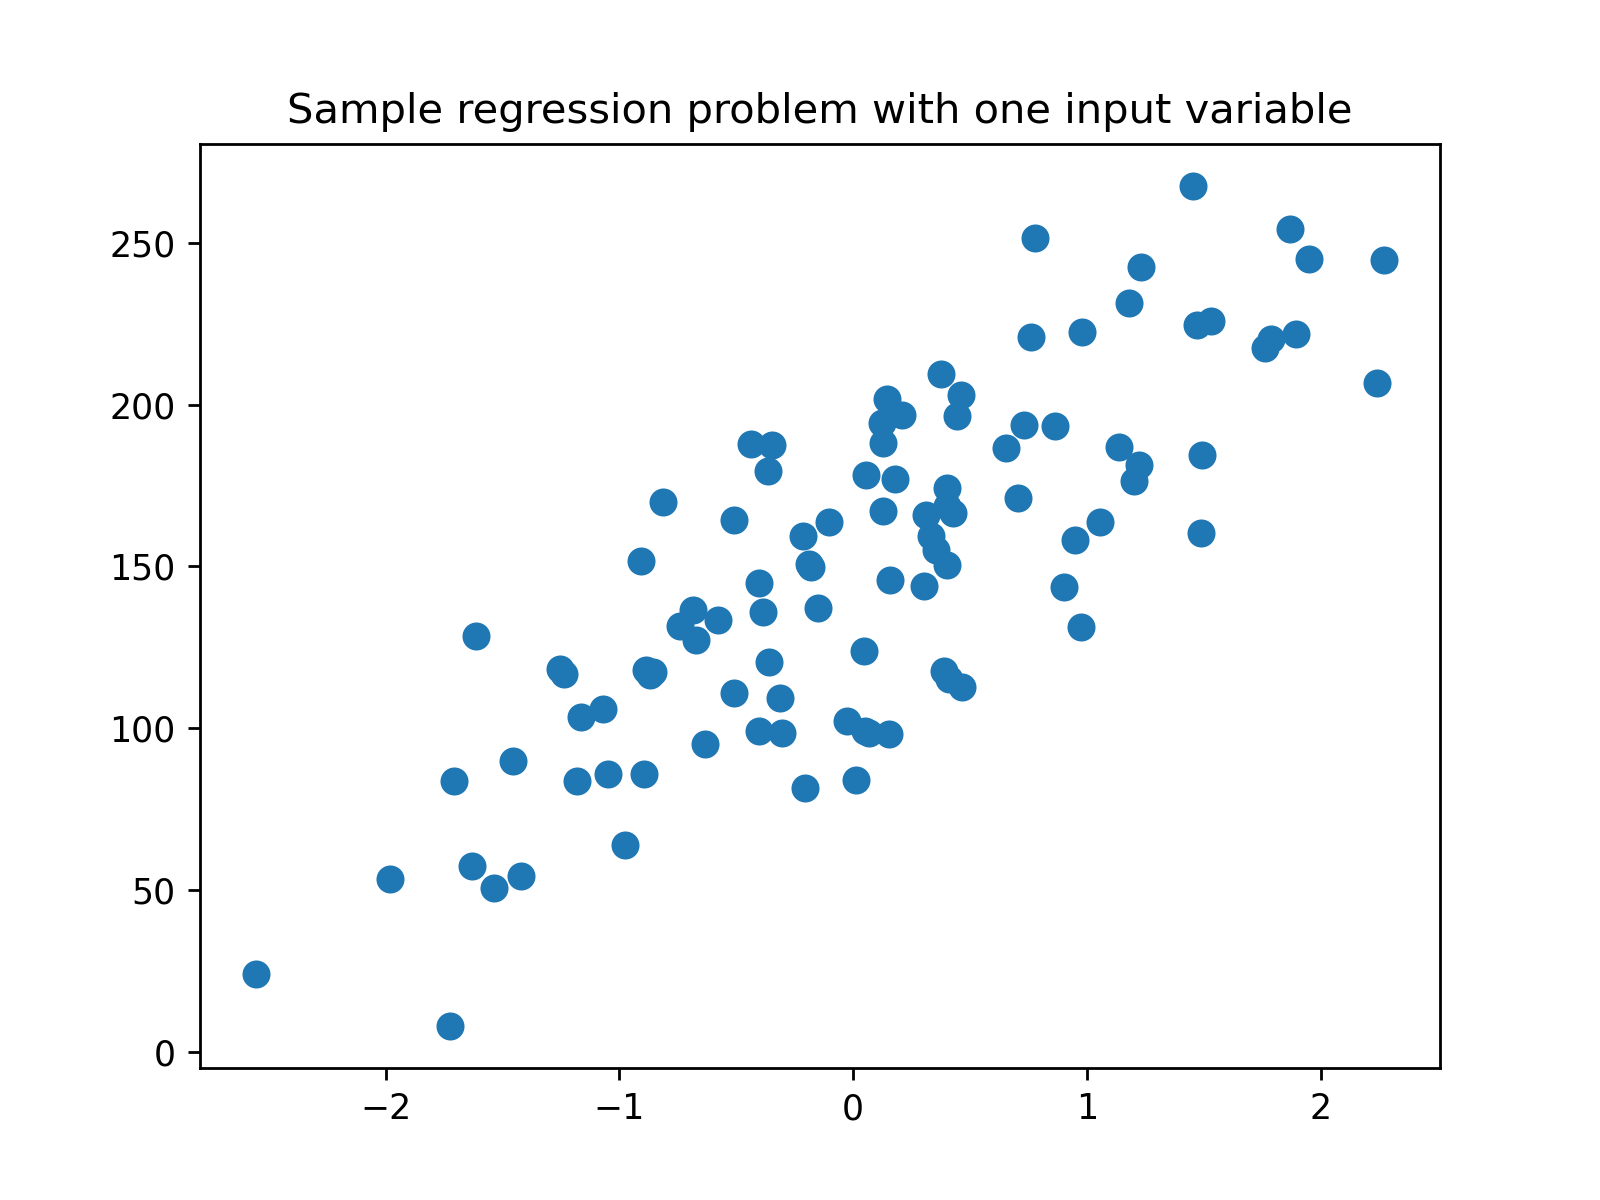

<IPython.core.display.Javascript object>


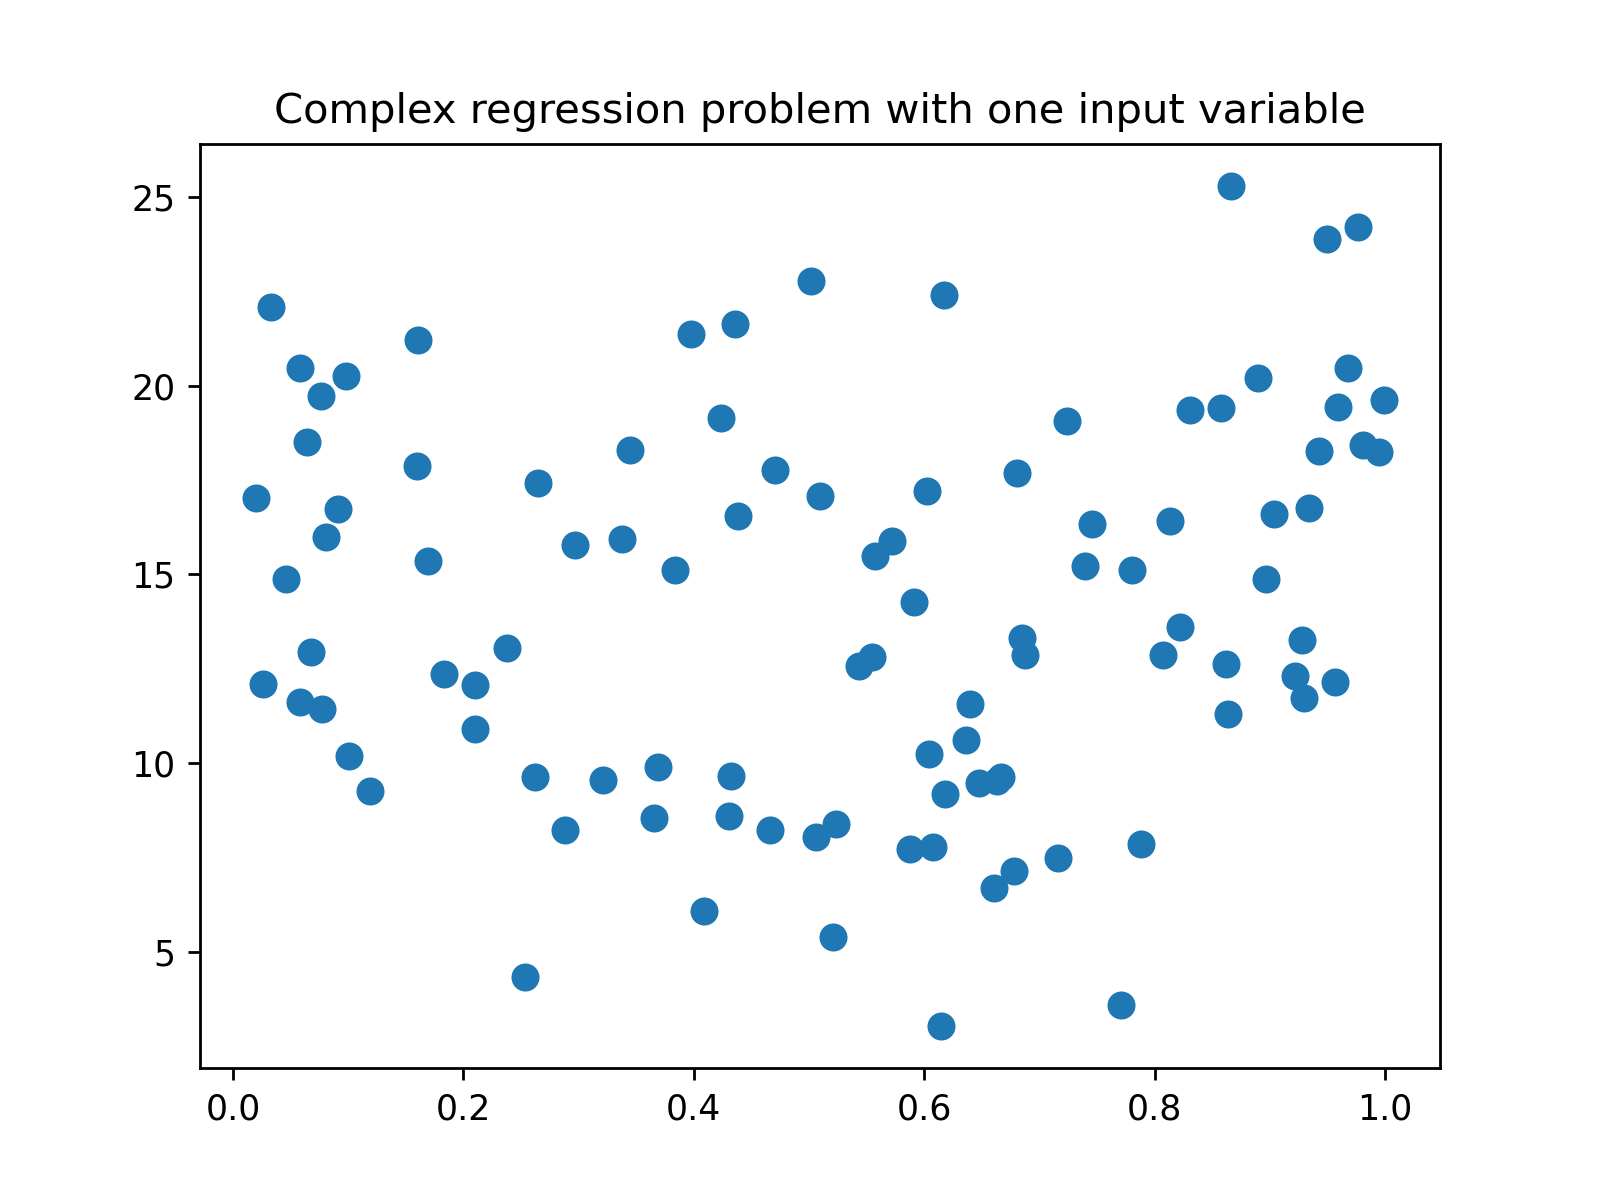

<IPython.core.display.Javascript object>


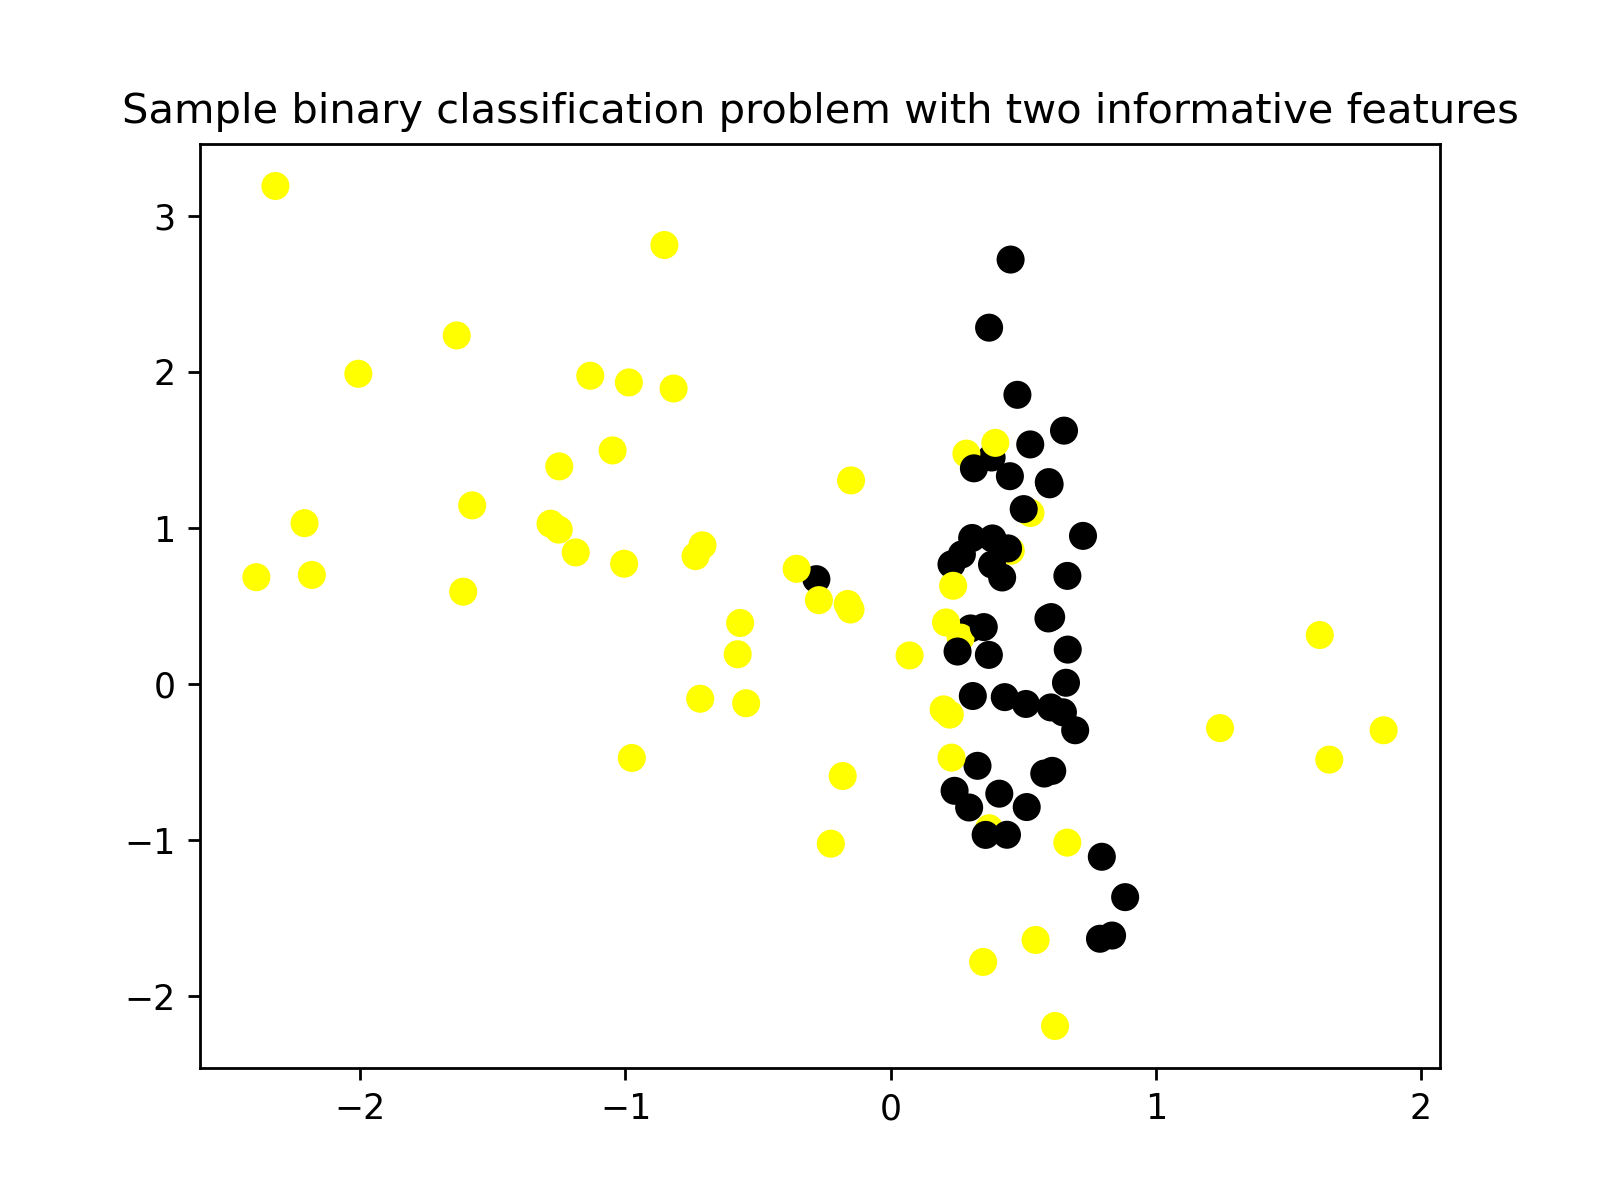

<IPython.core.display.Javascript object>


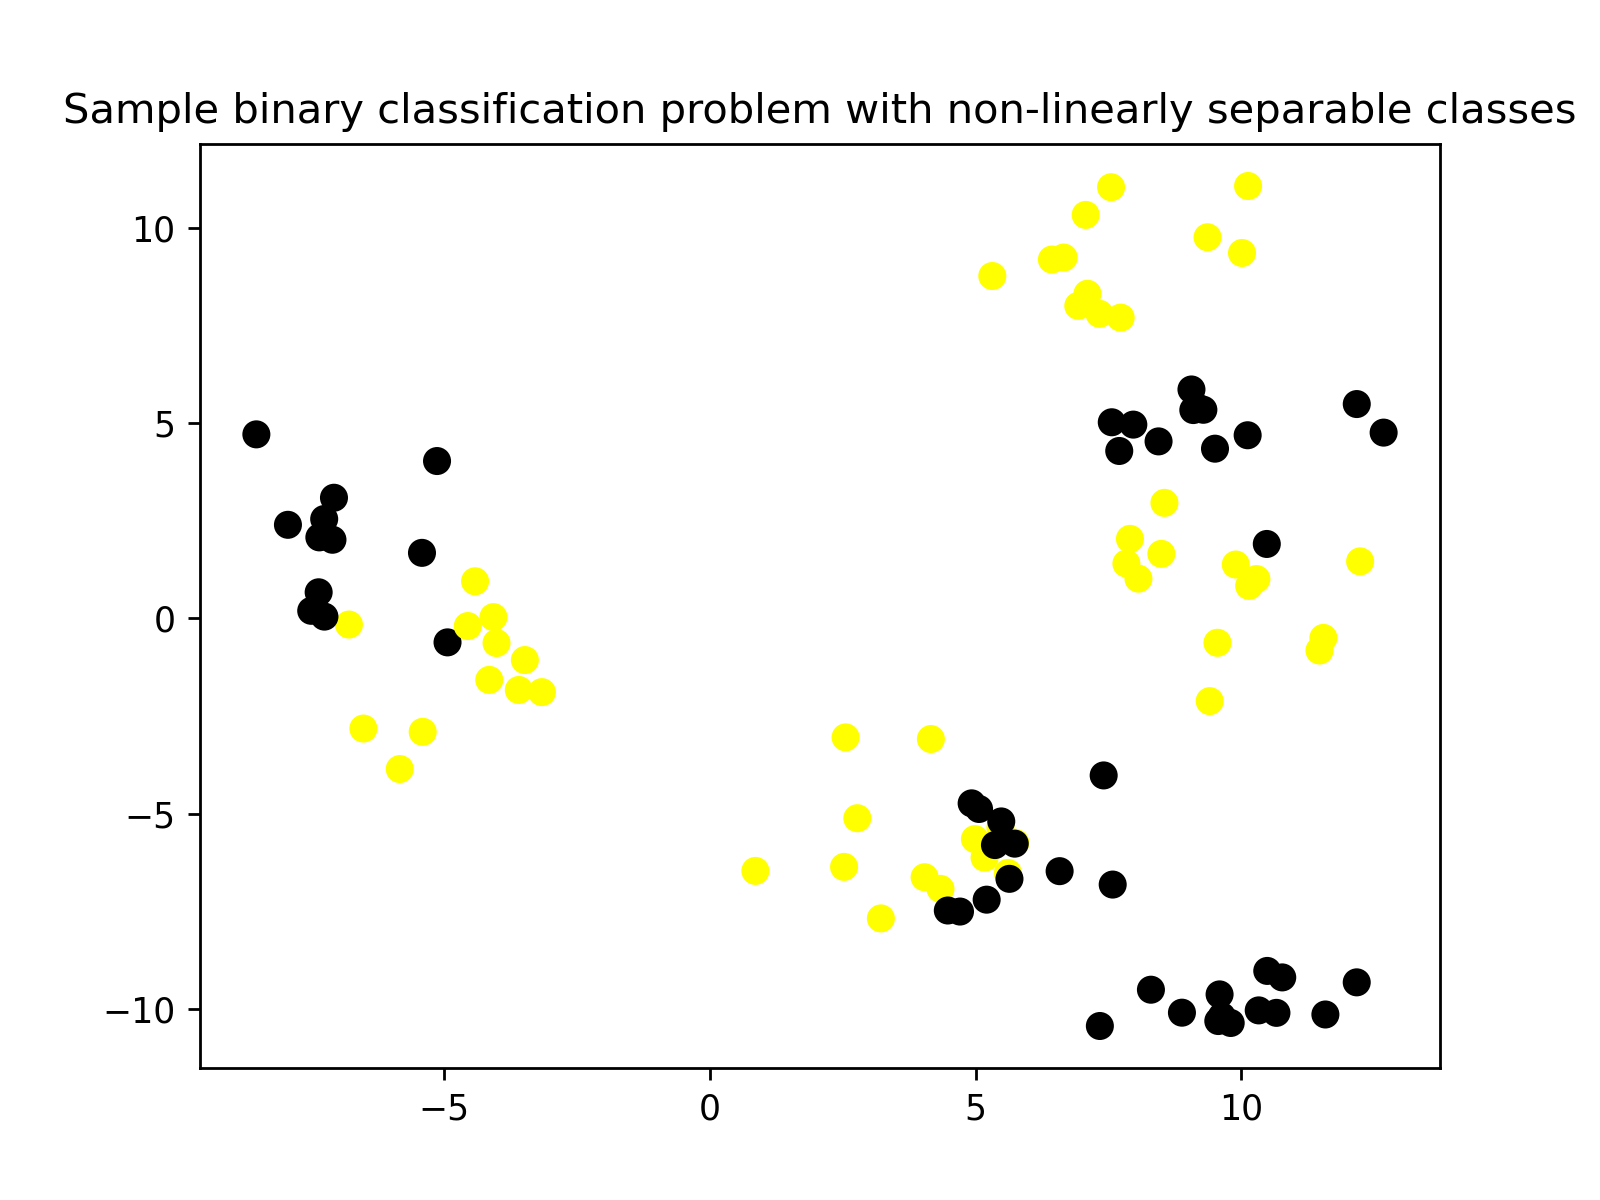

In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


### Linear Regression: An example plot

<IPython.core.display.Javascript object>


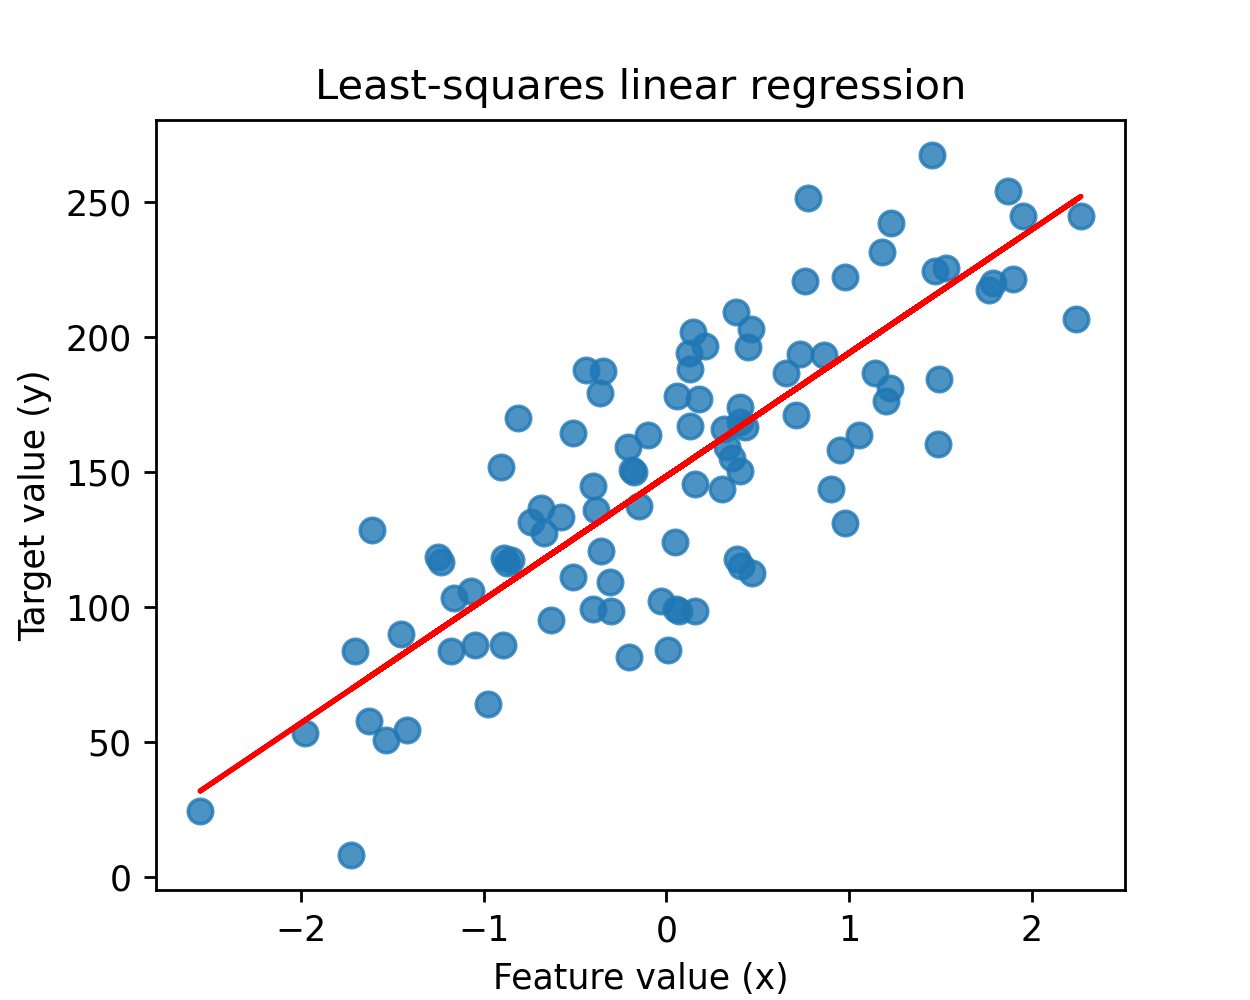

In [4]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306726021985
linear model coeff:
[ 1.62e-03 -9.43e+01  1.36e+01 -3.13e+01 -8.15e-02 -1.69e+01 -2.43e-03
  1.53e+00 -1.39e-02 -7.72e+00  2.28e+01 -5.66e+00  9.35e+00  2.07e-01
 -7.43e+00  9.66e-03  4.38e-03  4.80e-03 -4.46e+00 -1.61e+01  8.83e+00
 -5.07e-01 -1.42e+00  8.18e+00 -3.87e+00 -3.54e+00  4.49e+00  9.31e+00
  1.74e+02  1.18e+01  1.51e+02 -3.30e+02 -1.35e+02  6.95e-01 -2.38e+01
  2.77e+00  3.82e-01  4.39e+00 -1.06e+01 -4.92e-03  4.14e+01 -1.16e-03
  1.19e+00  1.75e+00 -3.68e+00  1.60e+00 -8.42e+00 -3.80e+01  4.74e+01
 -2.51e+01 -2.88e-01 -3.66e+01  1.90e+01 -4.53e+01  6.83e+02  1.04e+02
 -3.29e+02 -3.14e+01  2.74e+01  5.12e+00  6.92e+01  1.98e-02 -6.12e-01
  2.65e+01  1.01e+01 -1.59e+00  2.24e+00  7.38e+00 -3.14e+01 -9.78e-05
  5.02e-05 -3.48e-04 -2.50e-04 -5.27e-01 -5.17e-01 -4.10e-01  1.16e-01
  1.46e+00 -3.04e-01  2.44e+00 -3.66e+01  1.41e-01  2.89e-01  1.77e+01
  5.97e-01  1.98e+00 -1.36e-01 -1.85e+00]
R-squared score (training): 

### Ridge Regression

In [6]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.4230358463437
ridge regression linear model coeff:
[ 1.95e-03  2.19e+01  9.56e+00 -3.59e+01  6.36e+00 -1.97e+01 -2.81e-03
  1.66e+00 -6.61e-03 -6.95e+00  1.72e+01 -5.63e+00  8.84e+00  6.79e-01
 -7.34e+00  6.70e-03  9.79e-04  5.01e-03 -4.90e+00 -1.79e+01  9.18e+00
 -1.24e+00  1.22e+00  1.03e+01 -3.78e+00 -3.73e+00  4.75e+00  8.43e+00
  3.09e+01  1.19e+01 -2.05e+00 -3.82e+01  1.85e+01  1.53e+00 -2.20e+01
  2.46e+00  3.29e-01  4.02e+00 -1.13e+01 -4.70e-03  4.27e+01 -1.23e-03
  1.41e+00  9.35e-01 -3.00e+00  1.12e+00 -1.82e+01 -1.55e+01  2.42e+01
 -1.32e+01 -4.20e-01 -3.60e+01  1.30e+01 -2.81e+01  4.39e+01  3.87e+01
 -6.46e+01 -1.64e+01  2.90e+01  4.15e+00  5.34e+01  1.99e-02 -5.47e-01
  1.24e+01  1.04e+01 -1.57e+00  3.16e+00  8.78e+00 -2.95e+01 -2.33e-04
  3.14e-04 -4.13e-04 -1.80e-04 -5.74e-01 -5.18e-01 -4.21e-01  1.53e-01
  1.33e+00  3.85e+00  3.03e+00 -3.78e+01  1.38e-01  3.08e-01  1.57e+01
  3.31e-01  3.36e+00  1.61e-01 -2.68

#### Ridge Regression with feature normalization 

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044156
ridge regression linear model coeff:
[  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]
R-squared score (training): 0.615
R-squared score (test): 0.599
Number of non-zero features: 88


#### Ridge Regression with regularization parameter: alpha

In [8]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



## Lasso Regression

In [9]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985786
lasso regression linear model coeff:
[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
Non-zero features: 20
R-squared score (training): 0.631
R-squared score (test): 0.624

Features with 

#### Lasso Regression with regularization paramter: alpha

In [10]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



### Polynomial Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 4.42  6.    0.53 10.24  6.55 -2.02 -0.32]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ 3.41e-12  1.66e+01  2.67e+01 -2.21e+01  1.24e+01  6.93e+00  1.05e+00
  3.71e+00 -1.34e+01 -5.73e+00  1.62e+00  3.66e+00  5.05e+00 -1.46e+00
  1.95e+00 -1.51e+01  4.87e+00 -2.97e+00 -7.78e+00  5.15e+00 -4.65e+00
  1.84e+01 -2.22e+00  2.17e+00 -1.28e+00  1.88e+00  1.53e-01  5.62e-01
 -8.92e-01 -2.18e+00  1.38e+00 -4.90e+00 -2.24e+00  1.38e+00 -5.52e-01
 -1.09e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(p